# Time operations

Time operations are notoriously difficult. In this notebook we go through some of scmdata's time operation capabilities.

## Imports

In [1]:
# NBVAL_IGNORE_OUTPUT
import datetime as dt
import traceback

import scmdata.time
from scmdata import ScmRun, run_append

import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

## Data

Here we use the RCP26 emissions data. This originally came from http://www.pik-potsdam.de/~mmalte/rcps/ and has since been re-written into a format which can be read by scmdata using the [pymagicc](https://github.com/openclimatedata/pymagicc) library. We are not currently planning on importing Pymagicc's readers into scmdata by default, please raise an issue [here](https://github.com/openscm/scmdata/issues) if you would like us to consider doing so.

In [2]:
var_to_plot = "Emissions|BC"

rcp26 = ScmRun("rcp26_emissions.csv")
rcp26["time operation"] = "raw"

<AxesSubplot:xlabel='time', ylabel='Mt BC / yr'>

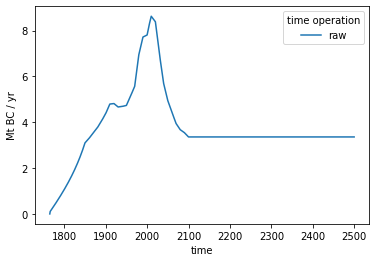

In [3]:
rcp26.filter(variable=var_to_plot).lineplot(hue="time operation")

For illustrative purposes, we shift the time points of the raw data before moving on.

In [4]:
rcp26["time"] = rcp26["time"].map(lambda x: dt.datetime(x.year, 3, 17))
rcp26 = ScmRun(rcp26)
rcp26.head()

time                                                                1765-03-17 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    raw            Mt BC / yr    Emissions|BC                0.000000   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010763   

time                                                                1766-03-17 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    raw            Mt BC / yr    Emissions|BC                0.106998   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010752   

time                                                                1767-03-17 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    raw            Mt BC / yr    Emissions|BC                0.133383   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010748   

time                                                                1768-03-17 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    raw            Mt BC / yr    Emissions|BC                0.159847   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010744   

time                                                                1769-03-17 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    raw            Mt BC / yr    Emissions|BC                0.186393   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010740   

time                                                                1770-03-17 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    raw            Mt BC / yr    Emissions|BC                0.213024   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010736   

time                                                                1771-03-17 00:00:00  \
model region scenario time operation unit          variable                      

## Resampling

The first method to consider is `resample`. This allows us to resample a dataframe onto different timesteps. Below, we resample the data onto monthly timesteps.

In [5]:
rcp26_monthly = rcp26.resample("MS")
rcp26_monthly["time operation"] = "start of month"
rcp26_monthly.head()

time                                                                1765-03-01 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    start of month Mt BC / yr    Emissions|BC               -0.004690   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010763   

time                                                                1765-04-01 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    start of month Mt BC / yr    Emissions|BC                0.004397   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010762   

time                                                                1765-05-01 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    start of month Mt BC / yr    Emissions|BC                0.013192   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010761   

time                                                                1765-06-01 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    start of month Mt BC / yr    Emissions|BC                0.022279   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010761   

time                                                                1765-07-01 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    start of month Mt BC / yr    Emissions|BC                0.031073   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010760   

time                                                                1765-08-01 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    start of month Mt BC / yr    Emissions|BC                0.040161   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010759   

time                                                                1765-09-01 00:00:00  \
model region scenario time operation unit          variable                      

We can also resample to e.g. start of year or end of year.

In [6]:
rcp26_end_of_year = rcp26.resample("A")
rcp26_end_of_year["time operation"] = "end of year"
rcp26_end_of_year.head()

time                                                                1764-12-31 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    end of year    Mt BC / yr    Emissions|BC               -0.022279   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010765   

time                                                                1765-12-31 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    end of year    Mt BC / yr    Emissions|BC                0.084719   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010754   

time                                                                1766-12-31 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    end of year    Mt BC / yr    Emissions|BC                0.127889   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010749   

time                                                                1767-12-31 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    end of year    Mt BC / yr    Emissions|BC                0.154279   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010745   

time                                                                1768-12-31 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    end of year    Mt BC / yr    Emissions|BC                0.180866   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010741   

time                                                                1769-12-31 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    end of year    Mt BC / yr    Emissions|BC                0.207479   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010736   

time                                                                1770-12-31 00:00:00  \
model region scenario time operation unit          variable                      

In [7]:
rcp26_start_of_year = rcp26.resample("AS")
rcp26_start_of_year["time operation"] = "start of year"
rcp26_start_of_year.head()

time                                                                1765-01-01 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    start of year  Mt BC / yr    Emissions|BC               -0.021986   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010765   

time                                                                1766-01-01 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    start of year  Mt BC / yr    Emissions|BC                0.085012   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010754   

time                                                                1767-01-01 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    start of year  Mt BC / yr    Emissions|BC                0.127961   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010749   

time                                                                1768-01-01 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    start of year  Mt BC / yr    Emissions|BC                0.154351   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010745   

time                                                                1769-01-01 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    start of year  Mt BC / yr    Emissions|BC                0.180938   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010741   

time                                                                1770-01-01 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    start of year  Mt BC / yr    Emissions|BC                0.207552   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010736   

time                                                                1771-01-01 00:00:00  \
model region scenario time operation unit          variable                      

## Interpolating

Not all time points are supported by resampling. If we want to use custom time points (e.g. middle of year), we can do that with interpolate.

In [8]:
rcp26_middle_of_year = rcp26.interpolate(
    target_times=sorted(
        [dt.datetime(v, 7, 1) for v in set([v.year for v in rcp26["time"]])]
    )
)
rcp26_middle_of_year["time operation"] = "middle of year"
rcp26_middle_of_year.head()

time                                                                1765-07-01 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    middle of year Mt BC / yr    Emissions|BC                0.031073   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010760   

time                                                                1766-07-01 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    middle of year Mt BC / yr    Emissions|BC                0.114660   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010751   

time                                                                1767-07-01 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    middle of year Mt BC / yr    Emissions|BC                0.141047   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010747   

time                                                                1768-07-01 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    middle of year Mt BC / yr    Emissions|BC                0.167556   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010743   

time                                                                1769-07-01 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    middle of year Mt BC / yr    Emissions|BC                0.194127   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010738   

time                                                                1770-07-01 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    middle of year Mt BC / yr    Emissions|BC                0.220783   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010734   

time                                                                1771-07-01 00:00:00  \
model region scenario time operation unit          variable                      

## Extrapolating

Extrapolating is also supported by scmdata.

In [9]:
rcp26_extrap = rcp26.interpolate(
    target_times=sorted([dt.datetime(v, 7, 1) for v in range(1700, 2551)])
)
rcp26_extrap["time operation"] = "extrapolated"
rcp26_extrap.head()

time                                                                1700-07-01 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    extrapolated   Mt BC / yr    Emissions|BC               -6.928487   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.011454   

time                                                                1701-07-01 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    extrapolated   Mt BC / yr    Emissions|BC               -6.821489   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.011443   

time                                                                1702-07-01 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    extrapolated   Mt BC / yr    Emissions|BC               -6.714491   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.011432   

time                                                                1703-07-01 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    extrapolated   Mt BC / yr    Emissions|BC               -6.607493   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.011422   

time                                                                1704-07-01 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    extrapolated   Mt BC / yr    Emissions|BC               -6.500202   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.011411   

time                                                                1705-07-01 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    extrapolated   Mt BC / yr    Emissions|BC               -6.393204   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.011400   

time                                                                1706-07-01 00:00:00  \
model region scenario time operation unit          variable                      

In [10]:
rcp26_extrap_const = rcp26.interpolate(
    target_times=sorted([dt.datetime(v, 7, 1) for v in range(1700, 2551)]),
    extrapolation_type="constant",
)
rcp26_extrap_const["time operation"] = "extrapolated constant"
rcp26_extrap_const.head()

time                                                                       1700-07-01 00:00:00  \
model region scenario time operation        unit          variable                               
IMAGE World  RCP26    extrapolated constant Mt BC / yr    Emissions|BC                0.000000   
                                            kt C2F6 / yr  Emissions|C2F6              0.000000   
                                            kt C6F14 / yr Emissions|C6F14             0.000000   
                                            kt CCl4 / yr  Emissions|CCl4              0.000000   
                                            kt CF4 / yr   Emissions|CF4               0.010763   

time                                                                       1701-07-01 00:00:00  \
model region scenario time operation        unit          variable                               
IMAGE World  RCP26    extrapolated constant Mt BC / yr    Emissions|BC                0.000000   
                                            kt C2F6 / yr  Emissions|C2F6              0.000000   
                                            kt C6F14 / yr Emissions|C6F14             0.000000   
                                            kt CCl4 / yr  Emissions|CCl4              0.000000   
                                            kt CF4 / yr   Emissions|CF4               0.010763   

time                                                                       1702-07-01 00:00:00  \
model region scenario time operation        unit          variable                               
IMAGE World  RCP26    extrapolated constant Mt BC / yr    Emissions|BC                0.000000   
                                            kt C2F6 / yr  Emissions|C2F6              0.000000   
                                            kt C6F14 / yr Emissions|C6F14             0.000000   
                                            kt CCl4 / yr  Emissions|CCl4              0.000000   
                                            kt CF4 / yr   Emissions|CF4               0.010763   

time                                                                       1703-07-01 00:00:00  \
model region scenario time operation        unit          variable                               
IMAGE World  RCP26    extrapolated constant Mt BC / yr    Emissions|BC                0.000000   
                                            kt C2F6 / yr  Emissions|C2F6              0.000000   
                                            kt C6F14 / yr Emissions|C6F14             0.000000   
                                            kt CCl4 / yr  Emissions|CCl4              0.000000   
                                            kt CF4 / yr   Emissions|CF4               0.010763   

time                                                                       1704-07-01 00:00:00  \
model region scenario time operation        unit          variable                               
IMAGE World  RCP26    extrapolated constant Mt BC / yr    Emissions|BC                0.000000   
                                            kt C2F6 / yr  Emissions|C2F6              0.000000   
                                            kt C6F14 / yr Emissions|C6F14             0.000000   
                                            kt CCl4 / yr  Emissions|CCl4              0.000000   
                                            kt CF4 / yr   Emissions|CF4               0.010763   

time                                                                       1705-07-01 00:00:00  \
model region scenario time operation        unit          variable                               
IMAGE World  RCP26    extrapolated constant Mt BC / yr    Emissions|BC                0.000000   
                                            kt C2F6 / yr  Emissions|C2F6              0.000000   
                                            kt C6F14 / yr Emissions|C6F14             0.000000   
                                            kt CCl4 / yr  Emissions|CCl4   

In [11]:
rcp26.head()

time                                                                1765-03-17 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    raw            Mt BC / yr    Emissions|BC                0.000000   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010763   

time                                                                1766-03-17 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    raw            Mt BC / yr    Emissions|BC                0.106998   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010752   

time                                                                1767-03-17 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    raw            Mt BC / yr    Emissions|BC                0.133383   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010748   

time                                                                1768-03-17 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    raw            Mt BC / yr    Emissions|BC                0.159847   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010744   

time                                                                1769-03-17 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    raw            Mt BC / yr    Emissions|BC                0.186393   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010740   

time                                                                1770-03-17 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    raw            Mt BC / yr    Emissions|BC                0.213024   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010736   

time                                                                1771-03-17 00:00:00  \
model region scenario time operation unit          variable                      

In [12]:
rcp26_extrap.head()

time                                                                1700-07-01 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    extrapolated   Mt BC / yr    Emissions|BC               -6.928487   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.011454   

time                                                                1701-07-01 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    extrapolated   Mt BC / yr    Emissions|BC               -6.821489   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.011443   

time                                                                1702-07-01 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    extrapolated   Mt BC / yr    Emissions|BC               -6.714491   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.011432   

time                                                                1703-07-01 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    extrapolated   Mt BC / yr    Emissions|BC               -6.607493   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.011422   

time                                                                1704-07-01 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    extrapolated   Mt BC / yr    Emissions|BC               -6.500202   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.011411   

time                                                                1705-07-01 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    extrapolated   Mt BC / yr    Emissions|BC               -6.393204   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.011400   

time                                                                1706-07-01 00:00:00  \
model region scenario time operation unit          variable                      

In [13]:
rcp26_extrap_const.head()

time                                                                       1700-07-01 00:00:00  \
model region scenario time operation        unit          variable                               
IMAGE World  RCP26    extrapolated constant Mt BC / yr    Emissions|BC                0.000000   
                                            kt C2F6 / yr  Emissions|C2F6              0.000000   
                                            kt C6F14 / yr Emissions|C6F14             0.000000   
                                            kt CCl4 / yr  Emissions|CCl4              0.000000   
                                            kt CF4 / yr   Emissions|CF4               0.010763   

time                                                                       1701-07-01 00:00:00  \
model region scenario time operation        unit          variable                               
IMAGE World  RCP26    extrapolated constant Mt BC / yr    Emissions|BC                0.000000   
                                            kt C2F6 / yr  Emissions|C2F6              0.000000   
                                            kt C6F14 / yr Emissions|C6F14             0.000000   
                                            kt CCl4 / yr  Emissions|CCl4              0.000000   
                                            kt CF4 / yr   Emissions|CF4               0.010763   

time                                                                       1702-07-01 00:00:00  \
model region scenario time operation        unit          variable                               
IMAGE World  RCP26    extrapolated constant Mt BC / yr    Emissions|BC                0.000000   
                                            kt C2F6 / yr  Emissions|C2F6              0.000000   
                                            kt C6F14 / yr Emissions|C6F14             0.000000   
                                            kt CCl4 / yr  Emissions|CCl4              0.000000   
                                            kt CF4 / yr   Emissions|CF4               0.010763   

time                                                                       1703-07-01 00:00:00  \
model region scenario time operation        unit          variable                               
IMAGE World  RCP26    extrapolated constant Mt BC / yr    Emissions|BC                0.000000   
                                            kt C2F6 / yr  Emissions|C2F6              0.000000   
                                            kt C6F14 / yr Emissions|C6F14             0.000000   
                                            kt CCl4 / yr  Emissions|CCl4              0.000000   
                                            kt CF4 / yr   Emissions|CF4               0.010763   

time                                                                       1704-07-01 00:00:00  \
model region scenario time operation        unit          variable                               
IMAGE World  RCP26    extrapolated constant Mt BC / yr    Emissions|BC                0.000000   
                                            kt C2F6 / yr  Emissions|C2F6              0.000000   
                                            kt C6F14 / yr Emissions|C6F14             0.000000   
                                            kt CCl4 / yr  Emissions|CCl4              0.000000   
                                            kt CF4 / yr   Emissions|CF4               0.010763   

time                                                                       1705-07-01 00:00:00  \
model region scenario time operation        unit          variable                               
IMAGE World  RCP26    extrapolated constant Mt BC / yr    Emissions|BC                0.000000   
                                            kt C2F6 / yr  Emissions|C2F6              0.000000   
                                            kt C6F14 / yr Emissions|C6F14             0.000000   
                                            kt CCl4 / yr  Emissions|CCl4   

<AxesSubplot:xlabel='time', ylabel='Mt BC / yr'>

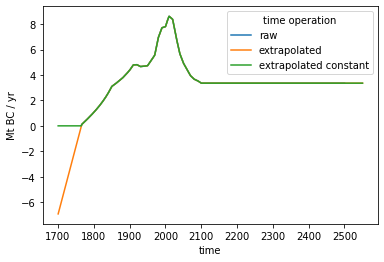

In [14]:
# NBVAL_IGNORE_OUTPUT
pdf = run_append([rcp26, rcp26_extrap, rcp26_extrap_const])

pdf.filter(variable=var_to_plot).lineplot(hue="time operation")

If we try to extrapolate beyond our source data but set `extrapolation_type=None`, we will receive an `InsufficientDataError`.

In [15]:
try:
    rcp26.interpolate(
        target_times=sorted([dt.datetime(v, 7, 1) for v in range(1700, 2551)]),
        extrapolation_type=None,
    )
except scmdata.time.InsufficientDataError:
    traceback.print_exc(limit=0, chain=False)

Traceback (most recent call last):
scmdata.time.InsufficientDataError: Target time points are outside the source time points, use an extrapolation type other than None


## Time means

With monthly data, we can then take time means. Most of the time we just want to take the annual mean. This can be done as shown below.

### Annual mean

In [16]:
rcp26_annual_mean = rcp26_monthly.time_mean("AC")
rcp26_annual_mean["time operation"] = "annual mean"
rcp26_annual_mean.head()

time                                                                1765-07-01 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    annual mean    Mt BC / yr    Emissions|BC                0.035676   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010759   

time                                                                1766-07-01 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    annual mean    Mt BC / yr    Emissions|BC                0.111128   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010751   

time                                                                1767-07-01 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    annual mean    Mt BC / yr    Emissions|BC                0.139999   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010747   

time                                                                1768-07-01 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    annual mean    Mt BC / yr    Emissions|BC                0.166494   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010743   

time                                                                1769-07-01 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    annual mean    Mt BC / yr    Emissions|BC                0.193071   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010739   

time                                                                1770-07-01 00:00:00  \
model region scenario time operation unit          variable                               
IMAGE World  RCP26    annual mean    Mt BC / yr    Emissions|BC                0.219724   
                                     kt C2F6 / yr  Emissions|C2F6              0.000000   
                                     kt C6F14 / yr Emissions|C6F14             0.000000   
                                     kt CCl4 / yr  Emissions|CCl4              0.000000   
                                     kt CF4 / yr   Emissions|CF4               0.010735   

time                                                                1771-07-01 00:00:00  \
model region scenario time operation unit          variable                      

As the data is an annual mean, we put it in July 1st (which is more or less the centre of the year).

### Annual mean centred on January 1st

Sometimes we want to take annual means centred on January 1st, rather than the middle of the year. This can be done as shown.

In [17]:
rcp26_annual_mean_jan_1 = rcp26_monthly.time_mean("AS")
rcp26_annual_mean_jan_1["time operation"] = "annual mean Jan 1"
rcp26_annual_mean_jan_1.head()

time                                                                   1765-01-01 00:00:00  \
model region scenario time operation    unit          variable                               
IMAGE World  RCP26    annual mean Jan 1 Mt BC / yr    Emissions|BC                0.008794   
                                        kt C2F6 / yr  Emissions|C2F6              0.000000   
                                        kt C6F14 / yr Emissions|C6F14             0.000000   
                                        kt CCl4 / yr  Emissions|CCl4              0.000000   
                                        kt CF4 / yr   Emissions|CF4               0.010762   

time                                                                   1766-01-01 00:00:00  \
model region scenario time operation    unit          variable                               
IMAGE World  RCP26    annual mean Jan 1 Mt BC / yr    Emissions|BC                0.077819   
                                        kt C2F6 / yr  Emissions|C2F6              0.000000   
                                        kt C6F14 / yr Emissions|C6F14             0.000000   
                                        kt CCl4 / yr  Emissions|CCl4              0.000000   
                                        kt CF4 / yr   Emissions|CF4               0.010755   

time                                                                   1767-01-01 00:00:00  \
model region scenario time operation    unit          variable                               
IMAGE World  RCP26    annual mean Jan 1 Mt BC / yr    Emissions|BC                0.126805   
                                        kt C2F6 / yr  Emissions|C2F6              0.000000   
                                        kt C6F14 / yr Emissions|C6F14             0.000000   
                                        kt CCl4 / yr  Emissions|CCl4              0.000000   
                                        kt CF4 / yr   Emissions|CF4               0.010749   

time                                                                   1768-01-01 00:00:00  \
model region scenario time operation    unit          variable                               
IMAGE World  RCP26    annual mean Jan 1 Mt BC / yr    Emissions|BC                0.153223   
                                        kt C2F6 / yr  Emissions|C2F6              0.000000   
                                        kt C6F14 / yr Emissions|C6F14             0.000000   
                                        kt CCl4 / yr  Emissions|CCl4              0.000000   
                                        kt CF4 / yr   Emissions|CF4               0.010745   

time                                                                   1769-01-01 00:00:00  \
model region scenario time operation    unit          variable                               
IMAGE World  RCP26    annual mean Jan 1 Mt BC / yr    Emissions|BC                0.179777   
                                        kt C2F6 / yr  Emissions|C2F6              0.000000   
                                        kt C6F14 / yr Emissions|C6F14             0.000000   
                                        kt CCl4 / yr  Emissions|CCl4              0.000000   
                                        kt CF4 / yr   Emissions|CF4               0.010741   

time                                                                   1770-01-01 00:00:00  \
model region scenario time operation    unit          variable                               
IMAGE World  RCP26    annual mean Jan 1 Mt BC / yr    Emissions|BC                0.206387   
                                        kt C2F6 / yr  Emissions|C2F6              0.000000   
                                        kt C6F14 / yr Emissions|C6F14             0.000000   
                                        kt CCl4 / yr  Emissions|CCl4              0.000000   
                                        kt CF4 / yr   Emissions|CF4               0.010737   

time                                          

As the data is centred on January 1st, we put it in January 1st.

### Annual mean centred on December 31st

Sometimes we want to take annual means centred on December 31st, rather than the middle of the year. This can be done as shown.

In [18]:
rcp26_annual_mean_dec_31 = rcp26_monthly.time_mean("A")
rcp26_annual_mean_dec_31["time operation"] = "annual mean Dec 31"
rcp26_annual_mean_dec_31.head()

time                                                                    1764-12-31 00:00:00  \
model region scenario time operation     unit          variable                               
IMAGE World  RCP26    annual mean Dec 31 Mt BC / yr    Emissions|BC                0.008794   
                                         kt C2F6 / yr  Emissions|C2F6              0.000000   
                                         kt C6F14 / yr Emissions|C6F14             0.000000   
                                         kt CCl4 / yr  Emissions|CCl4              0.000000   
                                         kt CF4 / yr   Emissions|CF4               0.010762   

time                                                                    1765-12-31 00:00:00  \
model region scenario time operation     unit          variable                               
IMAGE World  RCP26    annual mean Dec 31 Mt BC / yr    Emissions|BC                0.077819   
                                         kt C2F6 / yr  Emissions|C2F6              0.000000   
                                         kt C6F14 / yr Emissions|C6F14             0.000000   
                                         kt CCl4 / yr  Emissions|CCl4              0.000000   
                                         kt CF4 / yr   Emissions|CF4               0.010755   

time                                                                    1766-12-31 00:00:00  \
model region scenario time operation     unit          variable                               
IMAGE World  RCP26    annual mean Dec 31 Mt BC / yr    Emissions|BC                0.126805   
                                         kt C2F6 / yr  Emissions|C2F6              0.000000   
                                         kt C6F14 / yr Emissions|C6F14             0.000000   
                                         kt CCl4 / yr  Emissions|CCl4              0.000000   
                                         kt CF4 / yr   Emissions|CF4               0.010749   

time                                                                    1767-12-31 00:00:00  \
model region scenario time operation     unit          variable                               
IMAGE World  RCP26    annual mean Dec 31 Mt BC / yr    Emissions|BC                0.153223   
                                         kt C2F6 / yr  Emissions|C2F6              0.000000   
                                         kt C6F14 / yr Emissions|C6F14             0.000000   
                                         kt CCl4 / yr  Emissions|CCl4              0.000000   
                                         kt CF4 / yr   Emissions|CF4               0.010745   

time                                                                    1768-12-31 00:00:00  \
model region scenario time operation     unit          variable                               
IMAGE World  RCP26    annual mean Dec 31 Mt BC / yr    Emissions|BC                0.179777   
                                         kt C2F6 / yr  Emissions|C2F6              0.000000   
                                         kt C6F14 / yr Emissions|C6F14             0.000000   
                                         kt CCl4 / yr  Emissions|CCl4              0.000000   
                                         kt CF4 / yr   Emissions|CF4               0.010741   

time                                                                    1769-12-31 00:00:00  \
model region scenario time operation     unit          variable                               
IMAGE World  RCP26    annual mean Dec 31 Mt BC / yr    Emissions|BC                0.206387   
                                         kt C2F6 / yr  Emissions|C2F6              0.000000   
                                         kt C6F14 / yr Emissions|C6F14             0.000000   
                                         kt CCl4 / yr  Emissions|CCl4              0.000000   
                                         kt CF4 / yr   Emissions|CF4               0.010737   

time

As the data is centred on December 31st, we put it in December 31st.

## Comparing the results

We can compare the impact of these different methods with a plot as shown below.

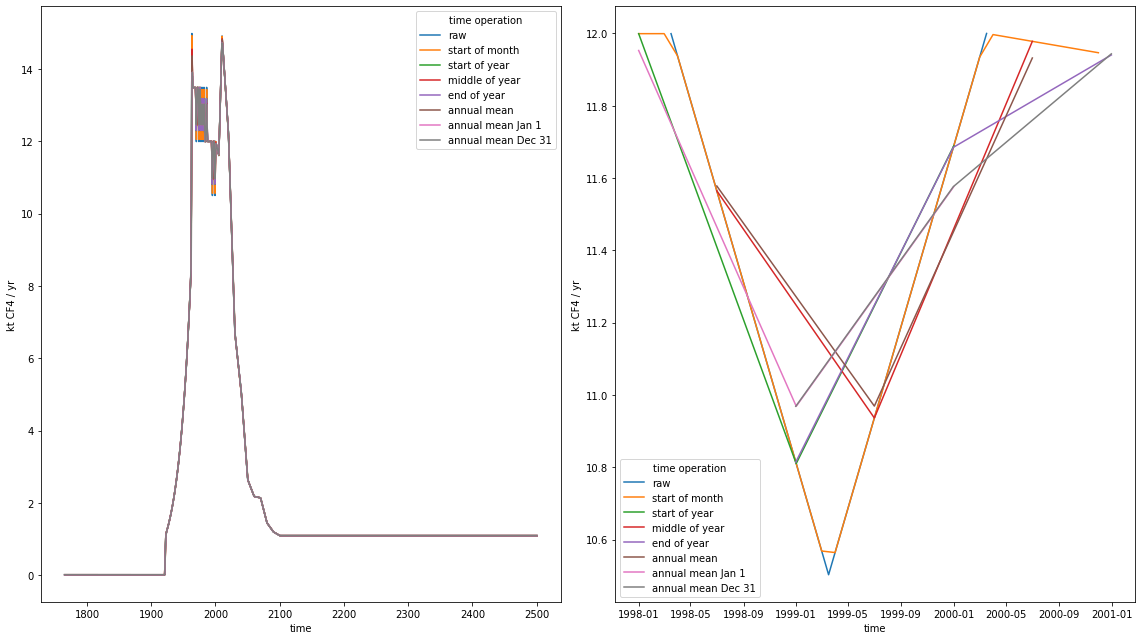

In [19]:
# NBVAL_IGNORE_OUTPUT
var_to_plot = "Emissions|CF4"
pdf = run_append(
    [
        rcp26,
        rcp26_monthly,
        rcp26_start_of_year,
        rcp26_middle_of_year,
        rcp26_end_of_year,
        rcp26_annual_mean,
        rcp26_annual_mean_jan_1,
        rcp26_annual_mean_dec_31,
    ]
)

fig = plt.figure(figsize=(16, 9))

ax = fig.add_subplot(121)
pdf.filter(variable=var_to_plot).lineplot(ax=ax, hue="time operation")

ax = fig.add_subplot(122)
pdf.filter(variable=var_to_plot, year=range(1998, 2001)).lineplot(
    ax=ax, hue="time operation"
)

plt.tight_layout()

When the timeseries is particularly noisy, the different operations result in slightly different timeseries. For example, shifting to start of month smooths the data a bit (as you're interpolating and resampling the underlying data) while taking means centred on different points in time changes your mean as you take different windows of your monthly data.

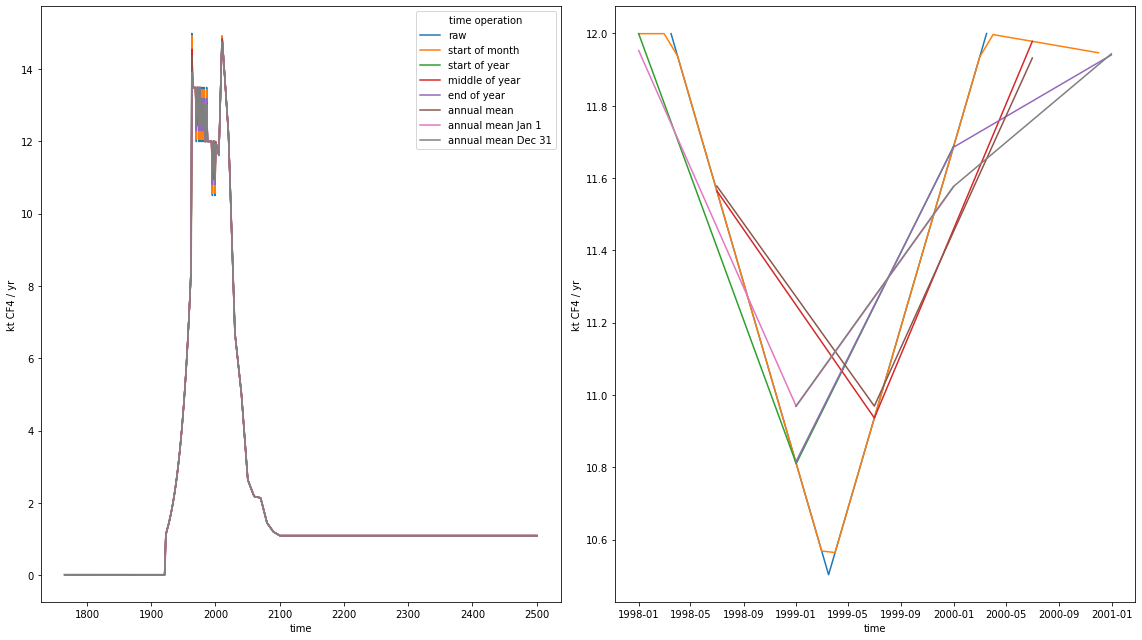

In [20]:
# NBVAL_IGNORE_OUTPUT
fig = plt.figure(figsize=(16, 9))

ax = fig.add_subplot(121)
pdf.filter(variable=var_to_plot).lineplot(ax=ax, hue="time operation")

ax = fig.add_subplot(122)
pdf.filter(variable=var_to_plot, year=range(1998, 2001)).lineplot(
    ax=ax, hue="time operation", legend=False
)

plt.tight_layout()

The lines above don't match the underlying timeseries e.g. the monthly data minimum is in the wrong place.

In [21]:
# NBVAL_IGNORE_OUTPUT
rcp26_monthly.filter(
    variable=var_to_plot, year=range(1998, 2001), month=[2, 3, 4, 5]
).timeseries()

,,,,,time,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1999-02-01,1999-03-01,1999-04-01,1999-05-01,2000-02-01,2000-03-01,2000-04-01,2000-05-01
model,region,scenario,time operation,unit,variable,,,,,,,,,,,,
IMAGE,World,RCP26,start of month,kt CF4 / yr,Emissions|CF4,11.999545,11.999564,11.938059,11.815028,10.683138,10.568309,10.564061,10.6868,11.815992,11.93464,11.997014,11.990841


<AxesSubplot:xlabel='time'>

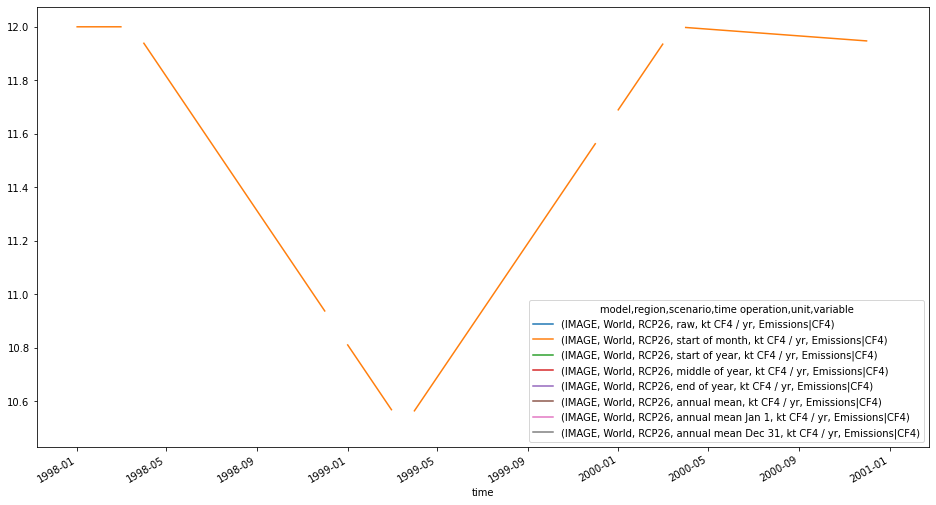

In [22]:
# NBVAL_IGNORE_OUTPUT
pdf.filter(variable=var_to_plot, year=range(1998, 2001)).timeseries().T.plot(
    figsize=(16, 9)
)

In [23]:
pdf.filter(
    variable=var_to_plot, year=range(1998, 2001)
).timeseries().T.sort_index()

model                  IMAGE                                              \
region                 World                                               
scenario               RCP26                                               
time operation           raw start of month start of year middle of year   
unit             kt CF4 / yr    kt CF4 / yr   kt CF4 / yr    kt CF4 / yr   
variable       Emissions|CF4  Emissions|CF4 Emissions|CF4  Emissions|CF4   
time                                                                       
1998-01-01               NaN      11.999523     11.999523            NaN   
1998-02-01               NaN      11.999545           NaN            NaN   
1998-03-01               NaN      11.999564           NaN            NaN   
1998-03-17         11.999575            NaN           NaN            NaN   
1998-04-01               NaN      11.938059           NaN            NaN   
1998-05-01               NaN      11.815028           NaN            NaN   
1998-06-01               NaN      11.687895           NaN            NaN   
1998-07-01               NaN      11.564864           NaN      11.564864   
1998-08-01               NaN      11.437731           NaN            NaN   
1998-09-01               NaN      11.310599           NaN            NaN   
1998-10-01               NaN      11.187567           NaN            NaN   
1998-11-01               NaN      11.060435           NaN            NaN   
1998-12-01               NaN      10.937403           NaN            NaN   
1998-12-31               NaN            NaN           NaN            NaN   
1999-01-01               NaN      10.810271     10.810271            NaN   
1999-02-01               NaN      10.683138           NaN            NaN   
1999-03-01               NaN      10.568309           NaN            NaN   
1999-03-17         10.502692            NaN           NaN            NaN   
1999-04-01               NaN      10.564061           NaN            NaN   
1999-05-01               NaN      10.686800           NaN            NaN   
1999-06-01               NaN      10.813629           NaN            NaN   
1999-07-01               NaN      10.936368           NaN      10.936368   
1999-08-01               NaN      11.063197           NaN            NaN   
1999-09-01               NaN      11.190027           NaN            NaN   
1999-10-01               NaN      11.312765           NaN            NaN   
1999-11-01               NaN      11.439595           NaN            NaN   
1999-12-01               NaN      11.562333           NaN            NaN   
1999-12-31               NaN            NaN           NaN            NaN   
2000-01-01               NaN      11.689163     11.689163            NaN   
2000-02-01               NaN      11.815992           NaN            NaN   
2000-03-01               NaN      11.934640           NaN            NaN   
2000-03-17         12.000100            NaN           NaN            NaN   
2000-04-01               NaN      11.997014           NaN            NaN   
2000-05-01               NaN      11.990841           NaN            NaN   
2000-06-01               NaN      11.984463           NaN            NaN   
2000-07-01               NaN      11.978290           NaN      11.978290   
2000-08-01               NaN      11.971912           NaN            NaN   
2000-09-01               NaN      11.965533           NaN            NaN   
2000-10-01               NaN      11.959361           NaN            NaN   
2000-11-01               NaN      11.952982           NaN            NaN   
2000-12-01               NaN      11.946810           NaN            NaN   
2000-12-31               NaN            NaN           NaN            NaN   

model                                                         \
region                                                         
scenario                                                       
time operation   end of year   annual mean annual mean Jan 1   
unit             kt